In [1]:
import glob
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
!ls

Receiver Operating Characteristics.ipynb
dall.csv
export-2019-06-10T04-15-16.905Z.csv
siyang and ground truth .ipynb
siyang.csv


In [2]:
siyangdata = pd.read_csv('siyang.csv', header=None)

In [3]:
siyangdata_name =siyangdata[0]

In [4]:
siyangdata_name.head()

0    12012.jpg
1    13564.jpg
2    13315.jpg
3    11659.jpg
4     1835.jpg
Name: 0, dtype: object

In [5]:
siyangdata_name = [int(w.replace('.jpg','')) for w in siyangdata_name]

In [6]:
siyangdata_name.sort()

In [7]:
siyangdata_name

[0,
 1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 100,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 127,
 128,
 129,
 132,
 166,
 194,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1160,
 1163,
 1222,
 1226,
 1234,
 1239,
 1244,
 1246,
 1247,
 1248,
 1249,
 1250,
 1251,
 1252,
 1253,
 1254,
 1255,
 1256,
 1257,
 1258,
 1260,
 1261,
 1262,
 1264,
 1299,
 1302,
 1303,
 1304,
 1305,
 1307,
 1309,
 1310,
 1311,
 1313,
 1314,
 1315,
 1316,
 1317,
 1318,
 1319,
 1320,
 1321,
 1323,
 1324,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1332,
 1333,
 1335,
 1336,
 1337,
 1338,
 1339,
 1341,
 1342,
 1412,
 1413,
 1414,
 1511,
 1512,
 1513,
 1517,
 1521,
 1522,
 1524,
 1529,
 1530,
 1531,
 1532,
 1557,
 1558,
 1559,
 1561,
 1562,
 1563,
 1565,
 1566,
 1569,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 

In [8]:
data = pd.read_csv('export-2019-06-10T04-15-16.905Z.csv', header=None)

In [9]:
ground_truth = data[9]

In [10]:
ground_truth= ground_truth.drop([0])

In [11]:
ground_truth.head()

1     0.jpg
2     1.jpg
3     2.jpg
4    10.jpg
5    11.jpg
Name: 9, dtype: object

In [12]:
ground_truth = [int(w.replace('.jpg','')) for w in ground_truth]

In [13]:
ground_truth.sort()

In [14]:
from scipy import stats

In [15]:
stats.describe(ground_truth)

DescribeResult(nobs=938, minmax=(0, 10078), mean=2254.783582089552, variance=5580599.497403591, skewness=2.541777284958475, kurtosis=5.9455222554058516)

In [16]:
stats.describe(siyangdata_name)

DescribeResult(nobs=1558, minmax=(0, 14022), mean=10847.974967907574, variance=18969288.13103645, skewness=-1.6558495295830689, kurtosis=0.9293839749146207)

In [17]:
MLdata = pd.read_csv('dall.csv', header=None)

In [18]:
MLdata.head()

,0,1
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,10.jpg,0
4,11.jpg,0


In [19]:
MLdata_name = MLdata[0]

In [23]:
MLdata_name

[0,
 1,
 2,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,

In [20]:
MLdata_name = [int(w.replace('.jpg','')) for w in MLdata_name]

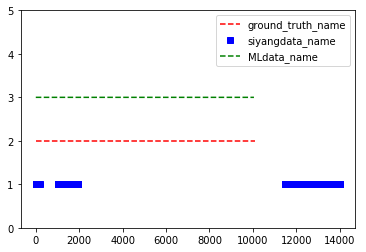

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y1 = np.ones(len(siyangdata_name))*1
y2 = np.ones(len(ground_truth))*2
y3 = np.ones(len(MLdata_name))*3
# evenly sampled time at 200ms intervals


# red dashes, blue squares and green triangles
plt.plot(ground_truth, y2, 'r--', label='ground_truth_name')
plt.plot(siyangdata_name, y1, 'bs',label = 'siyangdata_name')
plt.plot(MLdata_name, y3, 'g--',label = 'MLdata_name')
plt.legend(title='')
plt.ylim(0, 5)
plt.show()

In [25]:
intersection_ML_Ground_truth = set(ground_truth).intersection(set(MLdata_name))

In [26]:
len(intersection_ML_Ground_truth)

910

In [70]:
intersection =set(siyangdata_name).intersection(set(ground_truth))

In [71]:
intersection

{0,
 1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 100,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 127,
 128,
 129,
 132,
 166,
 194,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1511,
 1512,
 1513,
 1517,
 1521,
 1522,
 1524,
 1529,
 1530,
 1531,
 1532,
 1557,
 1558,
 1559,
 1561,
 1562,
 1563,
 1565,
 1566,
 1569,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1744,
 1745,
 1746}

In [72]:
len(intersection)

88